# Linear Regression from scratch with comments

In [127]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import math
import matplotlib.pyplot as plt

# required constants for script
r=0.77; s=1; epsilon = 10e-10
num_iters = 10000; alpha = 0.01

# Load data 
boston = load_boston()
boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_dataset['MEDV'] =  boston.target
y = boston_dataset.MEDV
X = boston_dataset.drop(['MEDV'], axis=1)

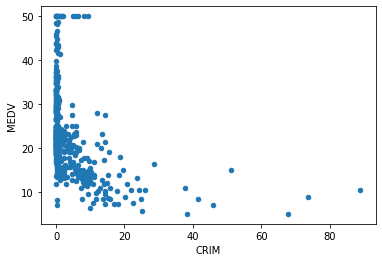

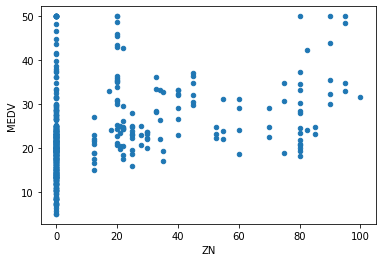

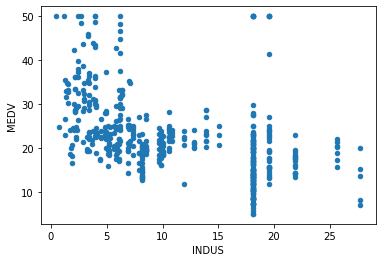

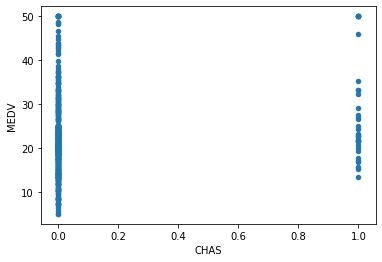

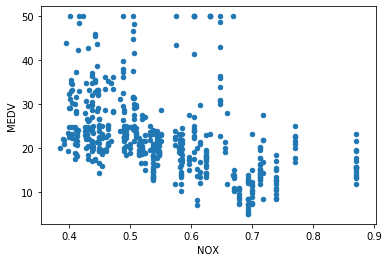

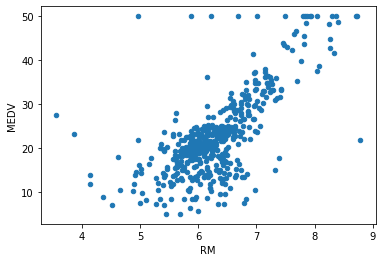

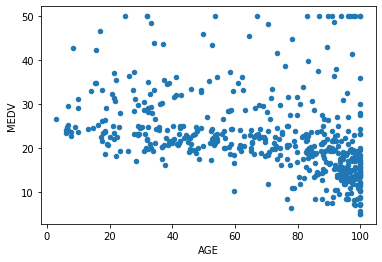

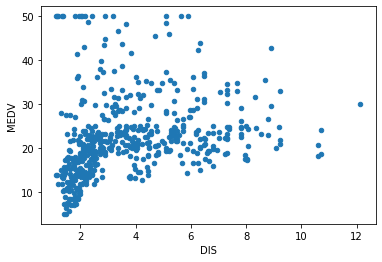

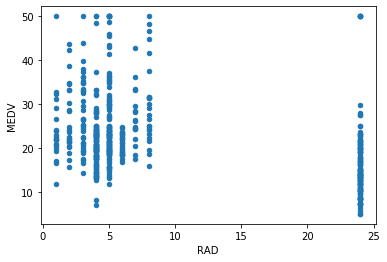

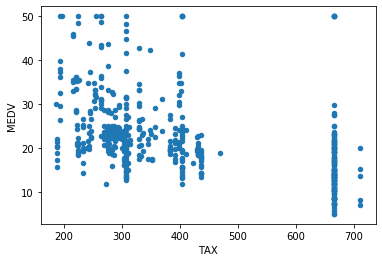

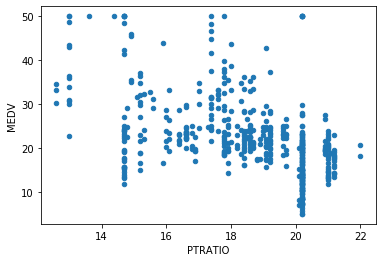

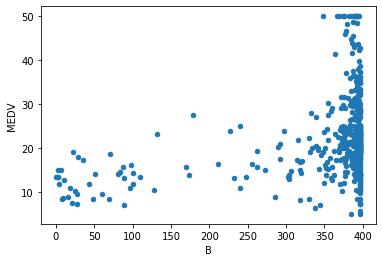

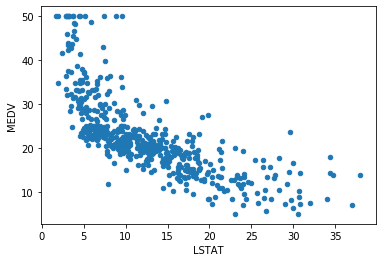

In [128]:
for col in boston_dataset.columns:
    if col != 'MEDV':
        boston_dataset.plot(x=col, y='MEDV', kind='scatter')

In [129]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = split_data(X, y, r, seed=s)
X_train = add_theta_0((X_train - X_train.mean(axis=0))/ X_train.std(axis=0), X)
X_test = add_theta_0((X_test - X_test.mean(axis=0))/ X_test.std(axis=0), X)

#### START LINEAR REGRESSION ####
# Define variables to store weights and losses
init_weights = np.zeros(len(X_train.columns))
weights_list = [init_weights]
weights = init_weights
losses = []
prev = math.inf

for n_iter in range(num_iters):
    # compute loss, gradient and rmse(actual loss)
    err = y_train - X_train.dot(weights)
    grad = 2*X_train.T.dot(err) / len(err)
    loss = np.sqrt(np.mean(err**2))
    
    # gradient w by descent update
    weights = weights + alpha * grad
    
    # store w and loss
    weights_list.append(weights)
    losses.append(loss)
    
    #Stop earlier if we reached convergence
    if(abs(loss - prev) < epsilon) :
        print("Reached Convergence !")
        break
    prev = loss
    
#Get final weights
params = weights_list[-1]

Reached Convergence !


In [130]:
params

CRIM         -0.924876
ZN            1.149424
INDUS        -0.140303
CHAS          0.625769
NOX          -1.828513
RM            2.517183
AGE          -0.229414
DIS          -3.307697
RAD           2.760916
TAX          -2.216898
PTRATIO      -1.947403
B             0.928697
LSTAT        -3.568102
INTERCEPT    22.471465
dtype: float64

In [131]:
data_to_plot = boston_dataset[['RM', 'MEDV']]
data_to_plot['line'] = (params.INTERCEPT + params.RM * boston_dataset.RM)

D:\Anaconda\envs\pysyft\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [132]:
data_to_plot.columns = ['RM', 'MEDV', 'line']

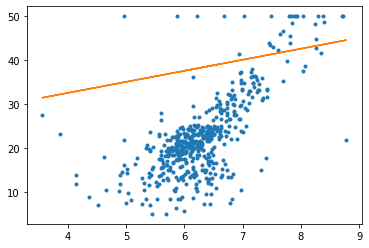

In [133]:
plt.plot(data_to_plot['RM'], data_to_plot['MEDV'], '.')
plt.plot(data_to_plot['RM'], data_to_plot['line'])
plt.show()

# Evaluating the LR Implementation

In [117]:
#Model is y = w2 + w0*PTRATIO + w1*LSTAT
# pred = params[13] + params[0]*X_test.CRIM + params[1]*X_test.ZN + params[2]*X_test.INDUS + params[3]*X_test.CHAS + params[4]*X_test.NOX + params[5]*X_test.RM + params[6]*X_test.AGE + params[7]*X_test.DIS + params[8]*X_test.RAD + params[9]*X_test.TAX + params[10]*X_test.PTRATIO + params[11]*X_test.B + params[12]*X_test.LSTAT 
pred = params[1] + params[0]*X_test.RM
print('R^2 value for LR: {0}'.format(r2_score(y_test, pred)))

#Evaluate performance
train_loss_np = losses[-1]
print("Train loss : {}".format(train_loss_np))
test_loss_np = np.sqrt(2 * 1/2*np.mean((y_test - pred)**2))
print("Test loss : {}".format(test_loss_np))

R^2 value for LR: 0.5562356284889438
Train loss : 6.629239718010096
Test loss : 6.577407742114532


# Supporting Functions
## Split data into test/train sets

In [4]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed to produce reproducable results
    np.random.seed(seed)
    
    # generate random indices
    indices = np.random.permutation(len(y))
    index_split = int(np.floor(ratio * len(y)))
    
    # create split
    x_train = x.iloc[indices[: index_split]]
    x_test = x.iloc[indices[index_split:]]
    y_train = y.iloc[indices[: index_split]]
    y_test = y.iloc[indices[index_split:]]
    return x_train, x_test, y_train, y_test

## Adding constant for easy computation of weights

In [5]:
def add_theta_0(x, X):
    x["INTERCEPT"] = pd.Series(np.ones(X.shape[0]))
    return x

# Linear Regression without regularisation using sklearn

In [45]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import math

boston = load_boston()
boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_dataset['MEDV'] =  boston.target

y = boston_dataset.MEDV
X  = boston_dataset.drop(['MEDV'], axis=1)

# y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.7406426641094095